Essa apresentação foi baseada nas aulas do Prof. Dr. Leonardo Eulálio Cabral, Professor Adjunto 1 do Departamento de Física da UFPE, quando este ministrou a disciplina de Métodos Computacionais. Desde já, meu muito obrigado pelo apoio de sempre, Professor.

---
João Victor M. Cardoso



---



# Importando as bibliotecas

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.random import random as rd
from scipy.constants import hbar

# A Equação de Schrödinger Unidimensional
Dada por $$-\frac{\hbar^2}{2m}\nabla^2 \psi(x) + V(x)\psi(x)=E\psi(x)$$

onde $E$ é um autovalor do operador Hamiltoniano associado ao sistema, designando a energia de um dado autoestado $\psi(x)$ e $V(x)$ é um potencial.

\
Primeiro, fazemos com que a equação fique independente de constantes, podemos fazer uma adimensionalização do tipo:

$$x→\frac{x}{a}\;,\; V(x)→\frac{2ma^2V(x)}{\hbar^2}\;,\; E → \frac{2ma^2E}{\hbar^2}$$

Reparem que o valor de $a$ (que possui unidade de comprimento) tem que ser bem pensado para que a resolução numérica **NÃO** ser invariante à escala.

\
Logo, temos a Equação de Schrödinger Independente do Tempo na forma adimensional:
$$-\nabla^2 \psi(x) + V(x)\psi(x)=E\psi(x)$$

\
Segundo, percebamos que para um laplaciano unidimensional ($∇^2$ apenas em $x$) atuando sobre uma função de onda $\psi(x)$ e discretizando a posição em intervalos bem definidos:
$$
\frac{\partial\psi}{\partial x^2} \;\dot{=}\; \frac{\frac{\partial\psi}{\partial x}{\huge |}_{x+\Delta x/2} - \frac{\partial\psi}{\partial x}{\huge |}_{x-\Delta x/2}}{\Delta x} = \frac{\psi(x+\Delta x)-2\psi(x)+\psi(x-\Delta x)}{\Delta x^2}
$$

\
Logo, usando a discretização, onde $x_k=x_0+k\Delta x\;,\;\psi_k=\psi(x_k)$ e $V_k=V(x_k)$
$$
-\frac{\psi_{k+1}-2\psi_{k}+\psi_{k-1}}{\Delta x^2}+V_k \psi_k=E\psi_k
$$
$$
\frac{2\psi_{k}-\psi_{k+1}-\psi_{k-1}}{\Delta x^2}+V_k \psi_k=E\psi_k → \sum^N_{j=1}H_{kj}\psi_j=E\psi_k
$$
onde
$$
H_{kj}=\begin{cases}
2\Delta x^{-2} + V_k, \text{ p/  } k=j\\
-\Delta x^{-2},\text{ p/  } k\pm1=j\\
0, \text{  em outros casos}
\end{cases}
$$

\
Perceba que as soluções numéricas serão próximas das soluções exatas para um $\Delta x$ pequeno. Assim, consideramos as soluções em que a variação espacial do autovetor são muito maiores do que $\Delta x$.

## A matriz T (auxiliar)

In [5]:
T=np.full(N,2)
T=np.diag(T)
T[0,1]=-1
T[N-1,N-2]=-1

if N>2:
  for i in range(1,N-1):
    T[i,i-1]=-1
    T[i,i+1]=-1

T

array([[ 2, -1,  0, ...,  0,  0,  0],
       [-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2, -1,  0],
       [ 0,  0,  0, ..., -1,  2, -1],
       [ 0,  0,  0, ...,  0, -1,  2]])

In [6]:
#Parâmetros para o plt.plot

plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']

Text(0.5, 0.98, 'N = 100')

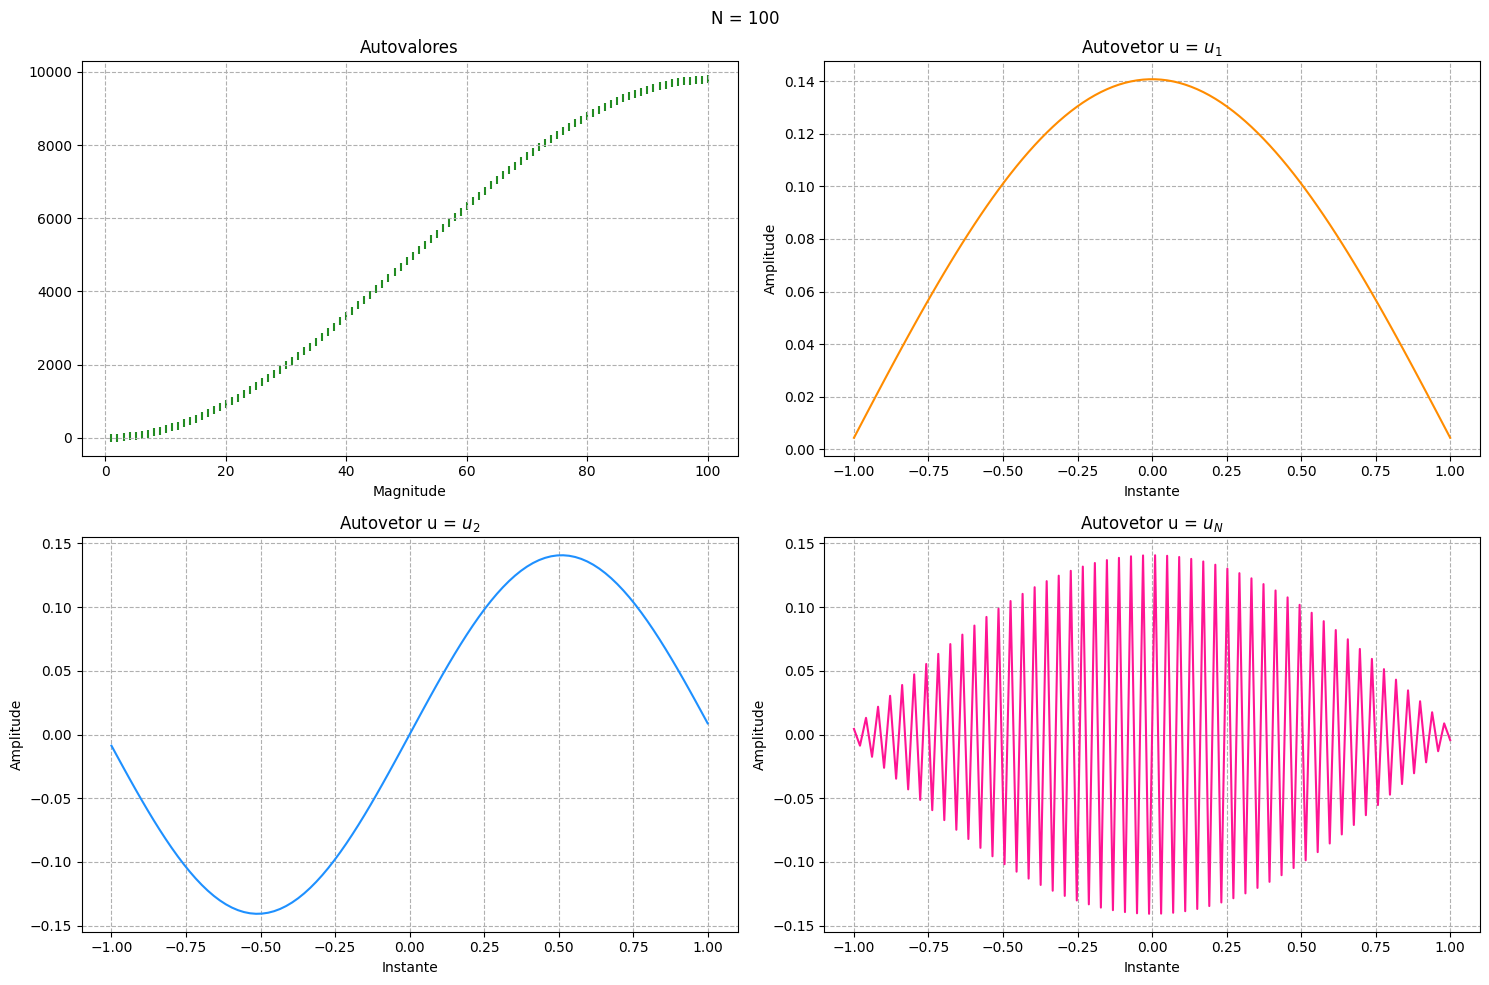

In [9]:
#@title Eq. de Schroedinger + Potencial Nulo

#Parâmetros
N=100 #População para discretização

#Matriz T
T=np.full(N,2)
T=np.diag(T)
T[0,1]=-1
T[N-1,N-2]=-1

if N>2:
  for i in range(1,N-1):
    T[i,i-1]=-1
    T[i,i+1]=-1

x=np.linspace(-1,1,N)
deltaX=2/(N-1)
V=0
H=((1/deltaX)**2)*T +V
autovalores,autovetores=np.linalg.eigh(H)

lista_contador=np.zeros(N)
for k in range(N):
  lista_contador[k]=k+1

fig,ax=plt.subplots(2,2)

ax[0,0].scatter(lista_contador,autovalores,color=colors[0],marker='|',rasterized=True)
ax[0,0].set_title('Autovalores')
ax[0,0].set_xlabel('Magnitude')
ax[0,0].grid(ls='--')
#ax[0,0].set_ylim(autovalores[0],autovalores[30])

ax[0,1].plot(x,autovetores[:,0],color=colors[1])
ax[0,1].set_title(f'Autovetor u = $u_1$')
ax[0,1].set_xlabel('Instante')
ax[0,1].set_ylabel('Amplitude')
ax[0,1].grid(ls='--')

if N>2:
  ax[1,0].plot(x,autovetores[:,1],color=colors[2])
  ax[1,0].set_title(f'Autovetor u = $u_2$')
  ax[1,0].set_xlabel('Instante')
  ax[1,0].set_ylabel('Amplitude')
  ax[1,0].grid(ls='--')


ax[1,1].plot(x,autovetores[:,-1],color=colors[3])
ax[1,1].set_title(f'Autovetor u = $u_N$')
ax[1,1].set_xlabel('Instante')
ax[1,1].set_ylabel('Amplitude')
ax[1,1].grid(ls='--')
fig.suptitle(f'N = {N}')

Text(0.5, 0.98, 'N = 1000')

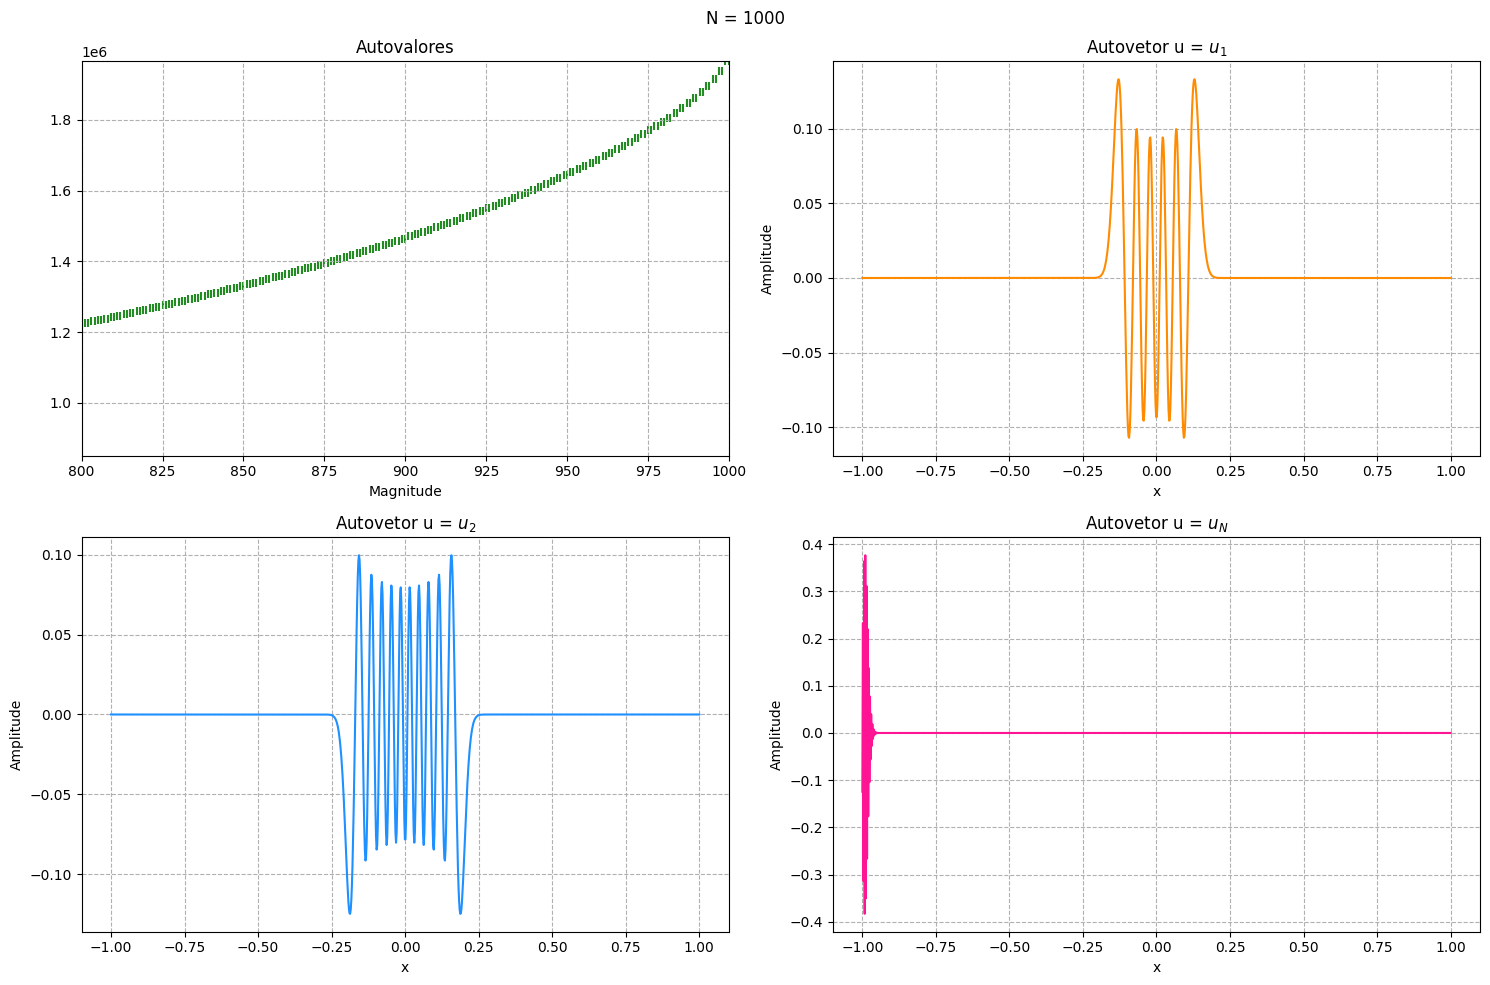

In [15]:
#@title Eq. de Schroedinger + Potencial Parabólico

#Parâmetros
N=1000
k=10**6

plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']

#Matriz T
T=np.full(N,2)
T=np.diag(T)
T[0,1]=-1
T[N-1,N-2]=-1

if N>2:
  for i in range(1,N-1):
    T[i,i-1]=-1
    T[i,i+1]=-1

x=np.linspace(-1,1,N,endpoint=True)
deltaX=2/(N-1)
V=k*(x**2)
V=np.diag(V)
H=((1/deltaX)**2)*T +V
autovalores,autovetores=np.linalg.eigh(H)

lista_contador=np.zeros(N)
for k in range(N):
  lista_contador[k]=k+1

fig,ax=plt.subplots(2,2)

ax[0,0].scatter(lista_contador,autovalores,color=colors[0],marker='|',rasterized=True)
ax[0,0].set_title('Autovalores')
ax[0,0].set_xlabel('Magnitude')
ax[0,0].grid(ls='--')
ax[0,0].set_xlim(800,1000)
ax[0,0].set_ylim(autovalores[500],autovalores[-1])

ax[0,1].plot(x,autovetores[:,10],color=colors[1])
ax[0,1].set_title(f'Autovetor u = $u_1$')
ax[0,1].set_xlabel('x')
ax[0,1].set_ylabel('Amplitude')
ax[0,1].grid(ls='--')

if N>2:
  ax[1,0].plot(x,autovetores[:,20],color=colors[2])
  ax[1,0].set_title(f'Autovetor u = $u_2$')
  ax[1,0].set_xlabel('x')
  ax[1,0].set_ylabel('Amplitude')
  ax[1,0].grid(ls='--')


ax[1,1].plot(x,autovetores[:,-1],color=colors[3])
ax[1,1].set_title(f'Autovetor u = $u_N$')
ax[1,1].set_xlabel('x')
ax[1,1].set_ylabel('Amplitude')
ax[1,1].grid(ls='--')
fig.suptitle(f'N = {N}')

In [ ]:
#@title Eq. de Schroedinger + Potencial Triangular Simétrico

#Parâmetros
N=100
k=10**4

plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']

#Matriz T
T=np.full(N,2)
T=np.diag(T)
T[0,1]=-1
T[N-1,N-2]=-1

if N>2:
  for i in range(1,N-1):
    T[i,i-1]=-1
    T[i,i+1]=-1

x=np.linspace(-1,1,N,endpoint=True)
deltaX=2/(N-1)
V=k*abs(x)
V=np.diag(V)
H=((1/deltaX)**2)*T +V
autovalores,autovetores=np.linalg.eigh(H)

lista_contador=np.zeros(N)
for k in range(N):
  lista_contador[k]=k+1


#ax[0,0].set_ylim(autovalores[0])
plt.scatter(lista_contador,autovalores,color=colors[0],marker='.',s=5,rasterized=True)
plt.title('Autovalores')
plt.xlabel('Magnitude')
plt.grid(ls='--')
plt.show()

for i in range(1,10):
  plt.clf()
  plt.plot(x,autovetores[:,10*i],color=colors[2])
  plt.title(f'Autovetor u = u_{10*i}')
  plt.xlabel('Instante')
  plt.ylabel('Amplitude')
  plt.grid(ls='--')
  plt.pause(0.001)
plt.show()


fig.suptitle(f'N = {N}')

In [ ]:
#@title Eq. de Schroedinger + Potencial Triangular Assimétrico para cima

#Parâmetros
N=100
k=10**4

plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']

#Matriz T
T=np.full(N,2)
T=np.diag(T)
T[0,1]=-1
T[N-1,N-2]=-1

if N>2:
  for i in range(1,N-1):
    T[i,i-1]=-1
    T[i,i+1]=-1

x=np.linspace(-1,1,N,endpoint=True)
deltaX=2/(N-1)
y=np.linspace(0,1,N,endpoint=True)
V=np.zeros(N)
V=np.zeros(N)
for i in range(len(V)):
  if x[i]>=-0.5 and x[i]<0 and y[i]<=1:
    V[i]=(k*x[i])+1
  elif x[i]>=0 and x[i]<=0.75 and y[i]<1:
    V[i]=-k*(x[i])
  else:
    V[i]=0
H=((1/deltaX)**2)*T + np.diag(V)
autovalores,autovetores=np.linalg.eigh(H)

lista_contador=np.zeros(N)
for k in range(N):
  lista_contador[k]=k+1


#ax[0,0].set_ylim(autovalores[0])
plt.scatter(lista_contador,autovalores,color=colors[0],marker='.',s=5,rasterized=True)
plt.title('Autovalores')
plt.xlabel('Magnitude')
plt.grid(ls='--')
plt.show()

for i in range(1,10):
  plt.clf()
  plt.plot(x,autovetores[:,i],color=colors[2])
  plt.title(f'Autovetor u = u_{10*i}')
  plt.xlabel('Instante')
  plt.ylabel('Amplitude')
  plt.grid(ls='--')
  plt.pause(0.001)
plt.show()


